In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text
from drawarrow import fig_arrow

## Load Dataset

Load and aggregate data into number of road accidents by **season**.


In [2]:
url = "https://raw.githubusercontent.com/anw-g01/dataviz-anw/refs/heads/main/road_safety_open_data_2016/data/road_accidents.csv"

df = pd.read_csv(url, parse_dates=["date_time"], date_format="%Y-%m-%d %H:%M:%S")

# dataframe to store animal involvement data from road_accidents
df = (
    df.drop_duplicates(subset=["index"])    # return one unique accident per row
    ["animal_involved"].value_counts()      # find no. of animal involvements (True/False)
    .reset_index()                          # convert to a dataframe
    .assign(
        percentage=lambda df: df["count"] / df["count"].sum() * 100    #  percentage of accidents involving animals
    )
)

df

,animal_involved,count,percentage
0,False,135881,99.458356
1,True,740,0.541644


## Pie Chart - Number of Accidents Involving Animals

740/136,621 accidents involved animals (0.542%)


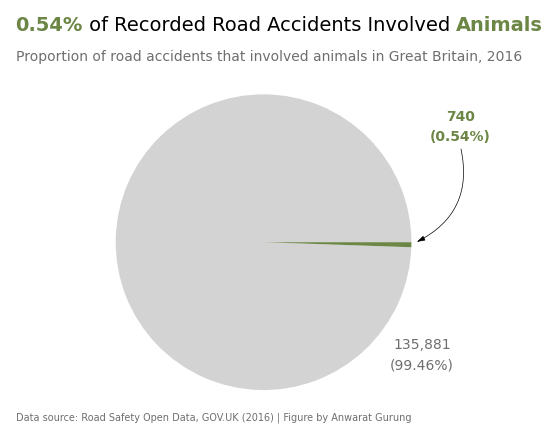

In [35]:
# choose a colour palette
cmap = load_cmap("AsteroidCity1")
colours = cmap.colors

n = df["count"].sum()    # total no. of unique accidents
x = df.loc[df["animal_involved"] == True, "count"].iloc[0]    # no. of accidents which involved animals
print(f"{x:,}/{n:,} accidents involved animals ({x / n * 100:.3f}%)")

# create figure
fig, ax = plt.subplots()

highlight_colour = colours[3]
ax.pie(
    x=df["percentage"],
    # labels=df4["animal_involved"],
    colors=["lightgrey", highlight_colour],
    # explode=[0, 0.4],
)

# numerical value + percentage annotations
no_value, yes_value = df["count"].to_list()
no_pct, yes_pct = df["percentage"].to_list()
fig.text(
    x=0.76,
    y=0.26,
    s=f"{no_value:,}\n({no_pct:.2f}%)",
    color="#6e6e6e",
    va="center",
    ha="center",
    linespacing=1.6
)
x_yes, y_yes = 0.82, 0.7    # coordinates for small portion
fig.text(
    x=x_yes,
    y=y_yes,
    s=f"{yes_value}\n({yes_pct:.2f}%)",
    color=highlight_colour,
    weight="bold",
    va="bottom",
    ha="center",
    linespacing=1.6
)

# draw arrow to annotate small portion
fig_arrow(    # using figure coordinates
    tail_position=[x_yes, y_yes - 0.005],
    head_position=[0.748, 0.493],
    fill_head=True,
    head_width=1.5,
    head_length=5,
    color="black",
    radius=-0.4,
    width=0.5
)


# chart title
x_value, y_value = 0.125, 0.94    # starting location of title text in figure coordinates
fig_text(
    x=x_value, y=y_value * 1.03,
    s=f"<{yes_pct:.2f}%> of Recorded Road Accidents Involved <Animals>",
    highlight_textprops=[
        {"color": highlight_colour, "weight": "bold"},
        {"color": highlight_colour, "weight": "bold"},
    ],
    fontsize=14
)

# chart subtitle
fig.text(
    x=x_value,
    y=y_value * 0.93,
    s="Proportion of road accidents that involved animals in Great Britain, 2016",
    size=10,
    color="#6e6e6e"
)

# chart caption
fig.text(
    x_value, 0.12,
    "Data source: Road Safety Open Data, GOV.UK (2016) | Figure by Anwarat Gurung",
    ha="left",
    va="bottom",
    fontsize=7,
    color="#6e6e6e",
)

# save figure as image file
plt.savefig("../images/accidents_involving_animals_pie_chart.png", dpi=200, bbox_inches="tight")

plt.show()